4.	It is vital for banks that customers put in long term fixed deposits as they use it to pay interest to customers and it is not viable to ask every customer if they will put in a long-term deposit or not. So, build a Logistic Regression model to predict whether a customer will put in a long-term fixed deposit or not based on the different variables given in the data. The output variable in the dataset is Y which is binary. Snapshot of the dataset is given below.

In [4]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',50)

In [5]:
data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/Logistic Regression/Assignments/bank_data.csv')
data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
# Dimensions of the dataset
data.shape

(45211, 32)

In [7]:
# Checking for null values
data.isnull().sum()

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64

    There are no null values

In [8]:
# Checking for duplicated values
data.duplicated().sum()

1

In [9]:
# Dropping duplicated rows
data.drop_duplicates(inplace = True, ignore_index=True)

In [11]:
# Descriptive Statistics
data.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
count,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.00000,45210.000000
mean,40.935921,0.018027,1362.302190,0.555850,0.160230,258.164057,2.763835,40.198739,0.580336,0.108405,0.040699,0.033422,0.817474,0.647733,0.064278,0.287989,0.115174,0.601924,0.282902,0.114377,0.215262,0.032891,0.027428,0.209179,0.050077,0.034926,0.091882,0.020748,0.168038,0.028821,0.00637,0.116987
std,10.618702,0.133050,3044.792762,0.496876,0.366823,257.530577,3.098055,100.129666,2.303465,0.310895,0.197594,0.179737,0.386282,0.477682,0.245250,0.452831,0.319235,0.489507,0.450414,0.318273,0.411009,0.178353,0.163328,0.406727,0.218107,0.183594,0.288863,0.142540,0.373904,0.167305,0.07956,0.321409
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [14]:
# Checking data types of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45210 non-null  int64
 1   default          45210 non-null  int64
 2   balance          45210 non-null  int64
 3   housing          45210 non-null  int64
 4   loan             45210 non-null  int64
 5   duration         45210 non-null  int64
 6   campaign         45210 non-null  int64
 7   pdays            45210 non-null  int64
 8   previous         45210 non-null  int64
 9   poutfailure      45210 non-null  int64
 10  poutother        45210 non-null  int64
 11  poutsuccess      45210 non-null  int64
 12  poutunknown      45210 non-null  int64
 13  con_cellular     45210 non-null  int64
 14  con_telephone    45210 non-null  int64
 15  con_unknown      45210 non-null  int64
 16  divorced         45210 non-null  int64
 17  married          45210 non-null  int64
 18  single

.

<AxesSubplot:xlabel='y', ylabel='count'>

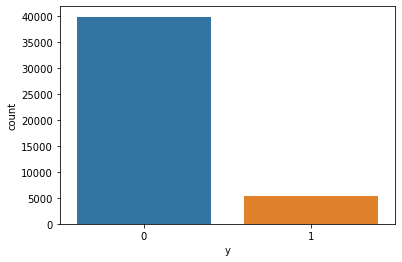

In [15]:
# Countplot for target variable
sns.countplot(x = data.y)

<AxesSubplot:xlabel='default', ylabel='count'>

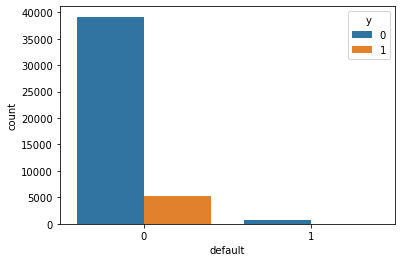

In [41]:
# Countplot for default variable
sns.countplot(x = data.default, hue= data.y)

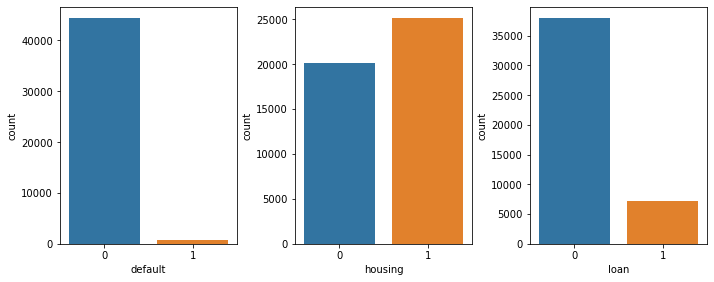

In [40]:
# Countplot for different features

fig, axes = plt.subplots(1,3,figsize=(10,4))
axes = axes.flatten()
index = 0
cols_list = ['default', 'housing', 'loan']
for i in cols_list:
    sns.countplot(x = data[i], ax=axes[index])
    index += 1
plt.tight_layout(w_pad = 0.5, h_pad = 0.5, pad = 1)

<AxesSubplot:xlabel='age', ylabel='Count'>

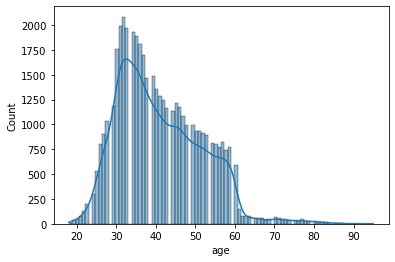

In [16]:
# Histogram for age
sns.histplot(x = data.age, kde = 1)

<AxesSubplot:xlabel='balance', ylabel='Count'>

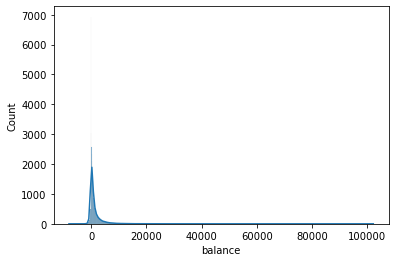

In [21]:
# Histogram for balance
sns.histplot(x = data.balance, kde = 1)

<AxesSubplot:xlabel='duration', ylabel='Count'>

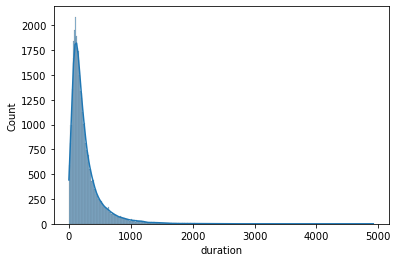

In [19]:
# Histogram for duration
sns.histplot(x = data.duration, kde = 1)

<AxesSubplot:xlabel='age'>

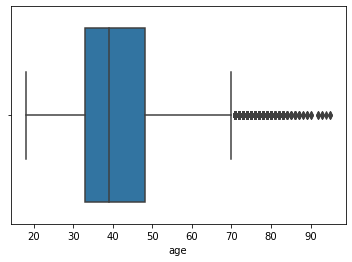

In [18]:
# Checking boxplot to check for outliers
sns.boxplot(x = data.age)

<AxesSubplot:xlabel='balance', ylabel='age'>

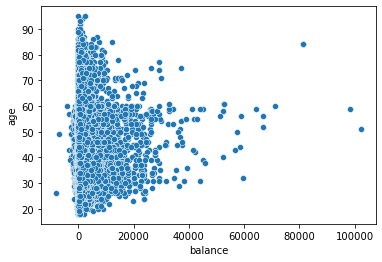

In [24]:
# Bivariate analysis
# relation between age and balance
sns.scatterplot(y = data.age, x = data.balance)

<AxesSubplot:xlabel='duration', ylabel='age'>

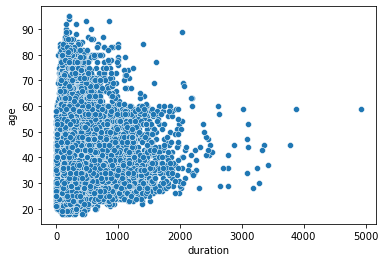

In [25]:
# relation between age and duration
sns.scatterplot(y = data.age, x = data.duration)

<AxesSubplot:xlabel='duration', ylabel='balance'>

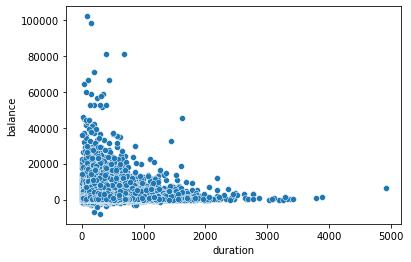

In [26]:
# relation between balance and duration
sns.scatterplot(y = data.balance, x = data.duration)

    Most of the people in the dataset have not applied to a fixed deposit
    Dafault customers have applied for fixed deposit
    The distribution for age, balance and duration are right skewed
    People with low balance have have been for longer duration 

In [27]:
# Grouping data based on clicked on ads feature

data['age','default','balance','duration']groupby(data.y).mean()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,poutother,poutsuccess,poutunknown,con_cellular,con_telephone,con_unknown,divorced,married,single,joadmin.,joblue.collar,joentrepreneur,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,40.838656,0.019113,1303.747627,0.581023,0.169334,221.182986,2.846347,36.422309,0.502167,0.107287,0.038401,0.013351,0.840961,0.624108,0.063024,0.312868,0.114852,0.612660,0.272488,0.113725,0.226046,0.034167,0.028331,0.204303,0.043786,0.034869,0.094812,0.016758,0.169259,0.027579,0.006363
1,41.670070,0.009832,1804.267915,0.365854,0.091511,537.294574,2.141047,68.702968,1.170354,0.116846,0.058045,0.184912,0.640197,0.826054,0.073738,0.100208,0.117603,0.520892,0.361505,0.119304,0.133863,0.023256,0.020609,0.245982,0.097561,0.035356,0.069767,0.050860,0.158820,0.038192,0.006428


<AxesSubplot:>

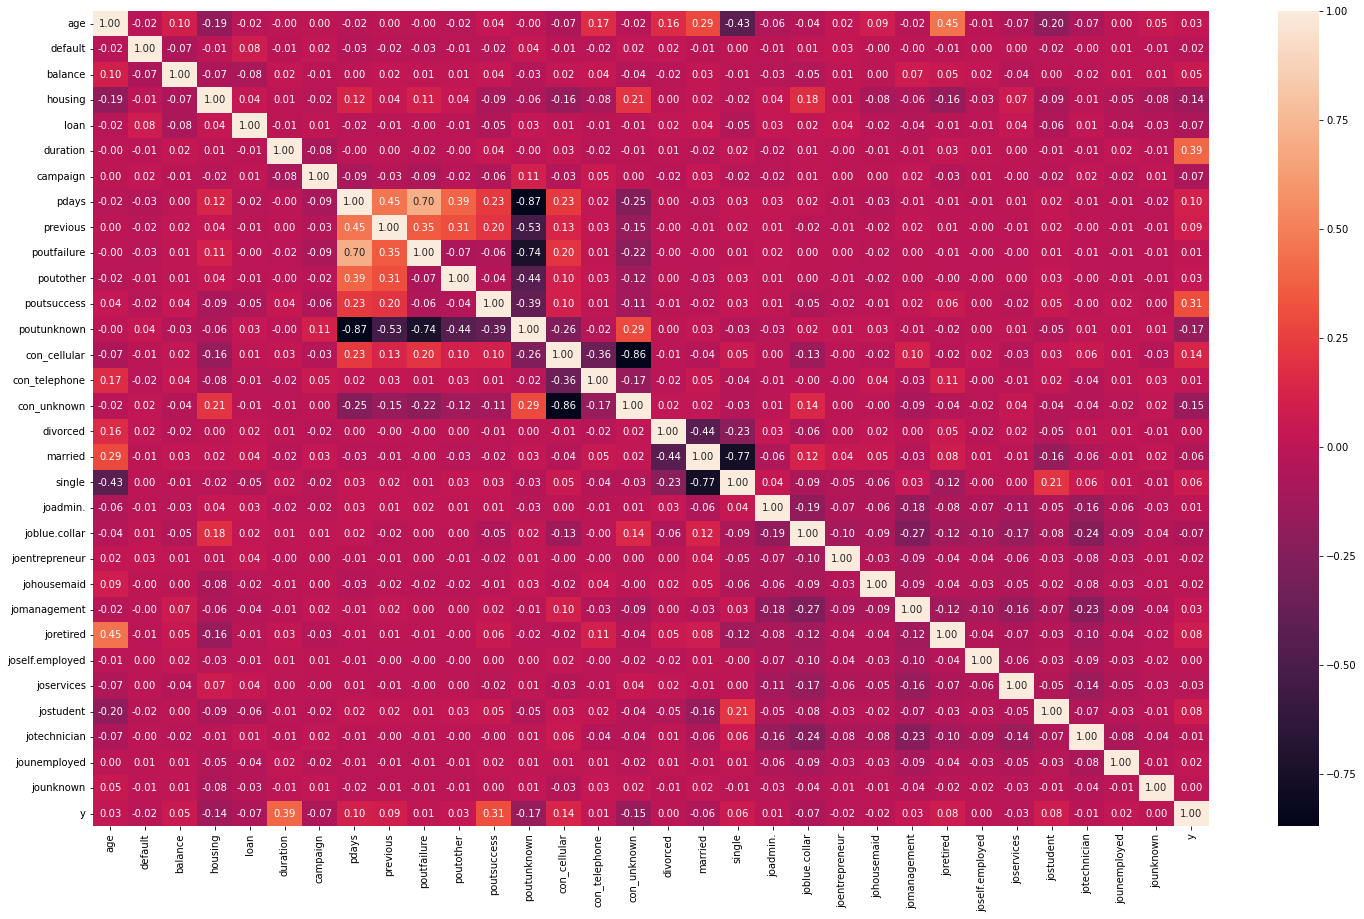

In [53]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot = True, fmt='0.2f')

In [62]:
#  Checking for low variance columns and eliminating them

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.05)
data1 = selector.fit_transform(data)

In [72]:
new_data = pd.DataFrame(data1,columns= selector.get_feature_names_out())

# MODEL BUILDING

In [73]:
# Splitting into independent and depenedent variables

x = new_data.drop('y', axis =1)
y = new_data.y

In [74]:
# Adding a constant to the dataset
from statsmodels.tools.tools import add_constant

x_new = add_constant(x)

In [76]:
new_data.columns

Index(['age', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'poutfailure', 'poutunknown', 'con_cellular',
       'con_telephone', 'con_unknown', 'divorced', 'married', 'single',
       'joadmin.', 'joblue.collar', 'jomanagement', 'joservices',
       'jotechnician', 'y'],
      dtype='object')

In [77]:
# Performing Logistic Regression
from statsmodels.api import Logit

logit_model = Logit(y, x_new).fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.257570
         Iterations 12


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Pseudo R-squared:     0.286     
Dependent Variable:     y                    AIC:                  23329.4466
Date:                   2022-07-31 20:51     BIC:                  23503.8281
No. Observations:       45210                Log-Likelihood:       -11645.   
Df Model:               19                   LL-Null:              -16315.   
Df Residuals:           45190                LLR p-value:          0.0000    
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         12.0000                                              
-----------------------------------------------------------------------------
               Coef.    Std.Err.      z     P>|z|      [0.025       0.975]   
-----------------------------------------------------------------------------
const         -0.7242 1263210.7228  -0.0000 1.0000 -2475848.2457 2475846.7974
age            0.0041       0.0018   2.2694 0.0232        0.0006       0.0076
balance        0.0000       0.0000   3.7757 0.0002        0.0000       0.0000
housing       -0.8543       0.0387 -22.0931 0.0000       -0.9301      -0.7785
loan          -0.6379       0.0574 -11.1152 0.0000       -0.7504      -0.5254
duration       0.0040       0.0001  64.7940 0.0000        0.0039       0.0042
campaign      -0.1215       0.0099 -12.2315 0.0000       -0.1410      -0.1021
pdays         -0.0010       0.0003  -3.4275 0.0006       -0.0015      -0.0004
previous       0.0007       0.0059   0.1219 0.9030       -0.0109       0.0123
poutfailure   -1.3403       0.0639 -20.9623 0.0000       -1.4656      -1.2150
poutunknown   -1.9030       0.0741 -25.6844 0.0000       -2.0483      -1.7578
con_cellular   0.1817  949569.2583   0.0000 1.0000 -1861121.3653 1861121.7288
con_telephone  0.0752  962089.8222   0.0000 1.0000 -1885661.3262 1885661.4766
con_unknown   -0.9810  910276.4405  -0.0000 1.0000 -1784110.0204 1784108.0583
divorced      -0.2804 2777166.6863  -0.0000 1.0000 -5443146.9647 5443146.4039
married       -0.4203 2777166.6863  -0.0000 1.0000 -5443147.1046 5443146.2640
single        -0.0235 2777166.6863  -0.0000 1.0000 -5443146.7077 5443146.6608
joadmin.       0.0357       0.0617   0.5785 0.5629       -0.0852       0.1566
joblue.collar -0.4381       0.0597  -7.3323 0.0000       -0.5552      -0.3210
jomanagement  -0.0267       0.0504  -0.5293 0.5966       -0.1255       0.0722
joservices    -0.3111       0.0745  -4.1768 0.0000       -0.4571      -0.1651
jotechnician  -0.1984       0.0562  -3.5273 0.0004       -0.3087      -0.0882
=============================================================================

"""

In [78]:
# Predicting the results 

pred = logit_model.predict(x_new)

In [79]:
# Finding the optimal threshold value 
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.11710906589864406

In [80]:
import pylab as pl

i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),\
                    'tpr' : pd.Series(tpr, index = i),\
                    '1-fpr' : pd.Series(1-fpr, index = i),\
                    'tf' : pd.Series(tpr - (1-fpr), index = i),\
                    'thresholds' : pd.Series(thresholds, index = i)})

roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
4855,0.191153,0.808849,0.808847,0.000001,0.117941


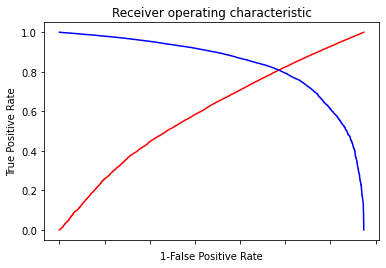

In [81]:
# Plot tpr vs 1-fpr

fig, ax = plt.subplots()
plt.plot(roc['tpr'], color = 'red')
plt.plot(roc['1-fpr'], color = 'blue')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])
plt.show()

The point where the two curves intersect gives us the optimal threshold point.

In [82]:
# Checking for area under the curve
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.882865


We have a good AUC value of 88.28 %

In [85]:
# Filling all the cells with zeroes
from sklearn.metrics import classification_report

data["pred"] = np.zeros(45210)
# taking threshold value and above the prob value will be treated as correct value 
data.loc[pred > optimal_threshold, "pred"] = 1
# classification report
classification = classification_report(data["pred"], data.y)
print(classification)

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88     33230
         1.0       0.81      0.36      0.50     11980

    accuracy                           0.81     45210
   macro avg       0.81      0.66      0.69     45210
weighted avg       0.81      0.81      0.78     45210



In [86]:
# Performing train test split

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25, stratify=y)

In [87]:
# Checking the split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((33907, 22), (11303, 22), (33907,), (11303,))

In [88]:
# Performing Logistic Regression

Actual_model = Logit(y_train, x_train).fit()
Actual_model.summary()

Optimization terminated successfully.
         Current function value: 0.258162
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                33907
Model:                          Logit   Df Residuals:                    33887
Method:                           MLE   Df Model:                           19
Date:                Sun, 31 Jul 2022   Pseudo R-squ.:                  0.2847
Time:                        20:53:01   Log-Likelihood:                -8753.5
converged:                       True   LL-Null:                       -12237.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7024        nan        nan        nan         nan         nan
age               0.0030      0.002      1.442      0.149      -0.001       0.007
balance        1.687e-05   5.66e-06      2.980      0.003    5.77e-06     2.8e-05
housing          -0.8426      0.045    -18.917      0.000      -0.930      -0.755
loan             -0.6375      0.066     -9.701      0.000      -0.766      -0.509
duration          0.0040   7.21e-05     55.923      0.000       0.004       0.004
campaign         -0.1296      0.012    -11.153      0.000      -0.152      -0.107
pdays            -0.0009      0.000     -2.686      0.007      -0.001      -0.000
previous          0.0114      0.010      1.104      0.269      -0.009       0.032
poutfailure      -1.3032      0.073    -17.782      0.000      -1.447      -1.160
poutunknown      -1.8608      0.089    -20.830      0.000      -2.036      -1.686
con_cellular      0.1829        nan        nan        nan         nan         nan
con_telephone     0.1354        nan        nan        nan         nan         nan
con_unknown      -1.0207        nan        nan        nan         nan         nan
divorced         -0.2629   8.93e+05  -2.94e-07      1.000   -1.75e+06    1.75e+06
married          -0.4315   8.93e+05  -4.83e-07      1.000   -1.75e+06    1.75e+06
single           -0.0081   8.93e+05  -9.03e-09      1.000   -1.75e+06    1.75e+06
joadmin.          0.0222      0.071      0.312      0.755      -0.117       0.162
joblue.collar    -0.4680      0.069     -6.738      0.000      -0.604      -0.332
jomanagement     -0.0290      0.058     -0.498      0.619      -0.143       0.085
joservices       -0.3047      0.086     -3.559      0.000      -0.473      -0.137
jotechnician     -0.2021      0.065     -3.127      0.002      -0.329      -0.075
=================================================================================
"""

In [89]:
# Predicting the results for test data

from sklearn.metrics import confusion_matrix

pred_test = Actual_model.predict(x_test)

x_test['test_pred'] = np.zeros(x_test.shape[0])

x_test.loc[pred_test > optimal_threshold,'test_pred'] = 1

report_test = classification_report(x_test.test_pred, y_test)
print('Classification Report: ',report_test)

confusion_matrix_test = confusion_matrix(x_test.test_pred, y_test)
confusion_matrix_test

Classification Report:                precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      8283
         1.0       0.82      0.36      0.50      3020

    accuracy                           0.81     11303
   macro avg       0.81      0.66      0.69     11303
weighted avg       0.81      0.81      0.78     11303



array([[8041,  242],
       [1940, 1080]], dtype=int64)

In [90]:
# Predicting the results for train data

from sklearn.metrics import confusion_matrix

pred_train = Actual_model.predict(x_train)

x_train['train_pred'] = np.zeros(x_train.shape[0])

x_train.loc[pred_train > optimal_threshold,'train_pred'] = 1

report_train = classification_report(x_train.train_pred, y_train)
print('Classification Report: ',report_train)

confusion_matrix_train = confusion_matrix(x_train.train_pred, y_train)
confusion_matrix_train

Classification Report:                precision    recall  f1-score   support

         0.0       0.80      0.97      0.88     24818
         1.0       0.81      0.35      0.49      9089

    accuracy                           0.80     33907
   macro avg       0.81      0.66      0.69     33907
weighted avg       0.81      0.80      0.78     33907



array([[24065,   753],
       [ 5875,  3214]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(x_train.train_pred, y_train)
acc_test = accuracy_score(x_test.test_pred, y_test)

print(f'Accuracy score for train data: {acc_train}')
print(f'Accuracy score for test data: {acc_test}')

Accuracy score for train data: 0.8045241395582033
Accuracy score for test data: 0.8069539060426435
